In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
from statsmodels.distributions.empirical_distribution import ECDF

### Код, генерирующий выборки

Я выбрал бета рапределение(рандомно), распределение принимает два значения $\alpha$ и $\beta$,   $X$ ~ $B(\alpha, \beta)$ 

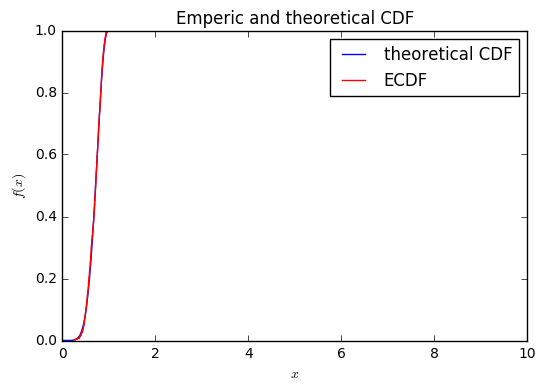

In [2]:
a, b = 7, 3
beta_rv = sts.beta(a, b)
sample = beta_rv.rvs(1000)
x = np.linspace(0,10,1000)
cdf = beta_rv.cdf(x)
ecdf = ECDF(sample)
plt.plot(x, cdf, label='theoretical CDF')
plt.step(ecdf.x, ecdf.y, label='ECDF', color='r')
plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.title('Emperic and theoretical CDF')
#plt.axis([0.3, 0.8, 0, 0.4])
plt.legend(loc='upper right')
plt.show()

Раскоментировал маштаб для наглядности.

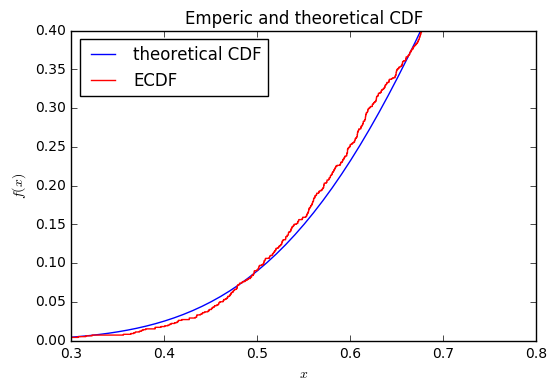

In [3]:
plt.plot(x, cdf, label='theoretical CDF')
plt.step(ecdf.x, ecdf.y, label='ECDF', color='r')
plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.title('Emperic and theoretical CDF')
plt.axis([0.3, 0.8, 0, 0.4])
plt.legend(loc='upper left')
plt.show()

Построим график функции плотности вероятности с гистограммой:

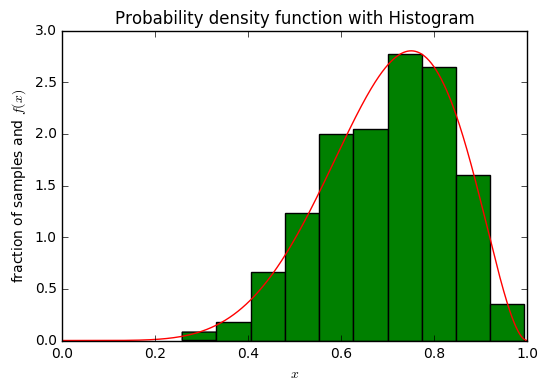

In [4]:
x = np.linspace(0,1,1000) #немного изменил параметры для наглядности
pdf = beta_rv.pdf(x)
plt.hist(sample, normed=True, color='g')
plt.plot(x, pdf, color='r')
plt.ylabel('fraction of samples and $f(x)$')
plt.title('Probability density function with Histogram')
plt.xlabel('$x$')
plt.show()

Генерируем 1000 выборок объёма n и строим их гистограммы распределений их выборочных средних.

In [5]:
'''Функция для составления массива выборочных средних'''
def Avgx(a):
    jest=[[beta_rv.rvs(a)] for i in range(1000)]
    rez=[]
    for count in jest:
        for array in count:
            rez.append(sum(array)/len(array))
    return rez

In [6]:
'''Функция для постройки гистограммы'''
def Makehist(n):
    x=Avgx(n)
    plt.hist(x, normed=True)
    plt.ylabel('$f(x)$')
    plt.xlabel('$x$')
    plt.title('Histogram of average distribution $n=' + str(n) + '$')
    return plt.show()

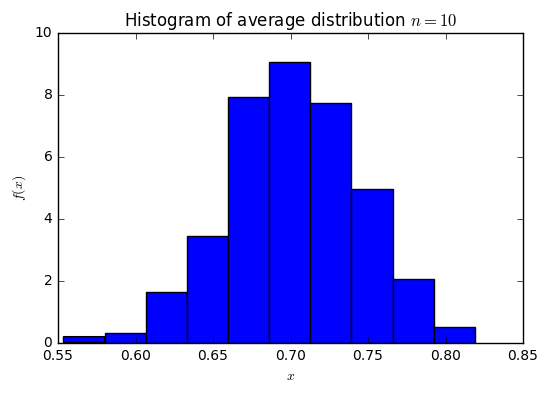

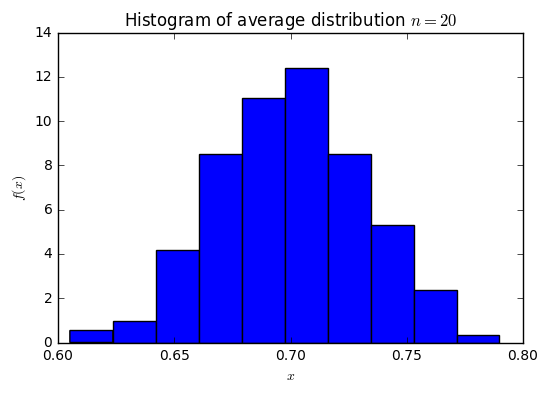

In [7]:
Makehist(10)
Makehist(20)

С этого момента наглядно видно, что распределение при $n<30$ стремиться к нормальному

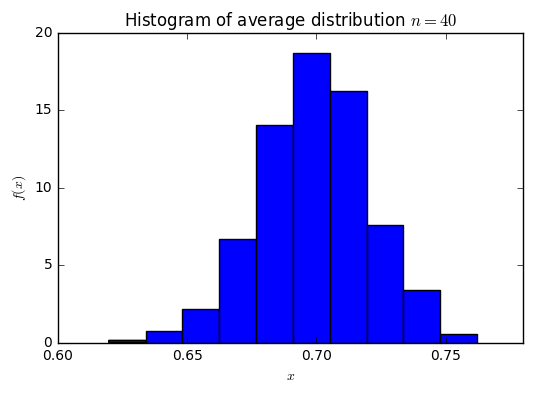

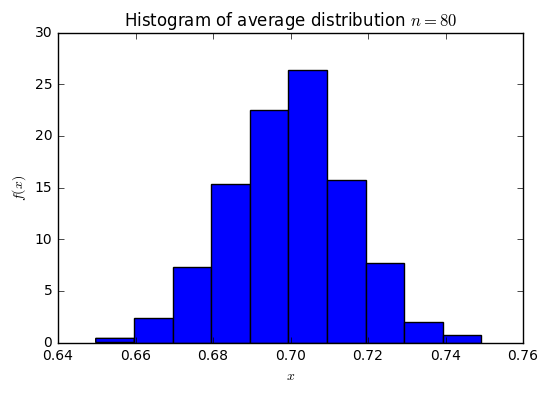

In [8]:
Makehist(40)
Makehist(80)

### Рассчет математического ожидания, дисперсии, сигмы. 

$X$ ~ $B(\alpha, \beta)$ => $EX = \frac{\alpha}{(\alpha+\beta)}$ , $D = \frac{\alpha\beta}{(\alpha+\beta)^2(\alpha+\beta+1)}$

In [9]:
'''Функция для подсчета Ex исходного распределения'''
def Ex(a, b):
    return a/(a+b)
'''Функция для подсчета D исходного распределения'''
def D(a,b):
    return (a*b)/((a+b+1)*(a+b)**2)
'''Функция для подсчета Sigma исходного распределения'''
def Orsigma(a,b,n):
    return np.sqrt((D(a,b))/n)
ex, d, origsig = Ex(float(a), float(b)), D(float(a), float(b)), Orsigma(float(a), float(b), 10) #чуть позже буду использовать мат ожидание, дисперсия не нужна, а сигма зависит от n, поэтому только мат ожидание.
print (ex,d,origsig)

(0.7, 0.019090909090909092, 0.043693144875265148)


Ищем мат ожидание распределения выборочных средних $EX=\frac{\sum(f * x)}{\sum(f)}$ = $\mu$ , где f это частота, а x это значение функции. Теперь считаем сигму средневыборочного распределения $\sigma^2 =\frac{\sum(x-\overline{x})}{n}$ . Более подробно о формулах, и почему они именно такие http://edu.alnam.ru/book_mpr.php?id=57 (стр. 118 и 122). 

In [10]:
'''Данную функцию использую для того, чтобы посчитать мат ожидание распределения выбороччных средних'''
def Matmidx(lst):
    dct = {}
    tmp=0
    rez=0
    for i in lst:
        if i in dct:
            dct[i] += 1
        else:
            dct[i] = 1  
    for i in lst:
        tmp+=dct[i]
        rez+= dct[i] * i
    return rez/tmp
'''Данную функцию использую для того, чтобы посчитать сигму распределения выбороччных средних'''
def Sigma(lst):
    midx=Matmidx(lst)
    Sam=[]
    for i in lst:
        Sam.append((i-midx)**2)
    return np.sqrt(sum(Sam)/(len(lst))) # если не брать корень, то получится выборочная дисперсия

Данные функции будут использоваться при расчете коэфициэнтов $\mu$ и $\sigma^2$ для приблежения функций к нормальному распределению при помощи согласно ЦПТ.

## Проверка центральной предельной теоремы

In [15]:
def PDF(n1):
    dismid = Avgx(n1)
    mu = Matmidx(dismid)
    sigma0 = Orsigma(float(a), float(b), n1) #сигма исходного
    sigma1 = Sigma(dismid) #сигма средневыборочного распределения
    ornorm_rv= sts.norm(loc=ex, scale=sigma0) #тут мы используем mu и сигму нашего исходного распределения, мат ожидание считали выше.
    norm_rv = sts.norm(loc=mu, scale=sigma1) #тут мы используем mu и сигму средневыборочного распределения
    print u'Мат ожидание μ и дисперсия σ исходного распределения: ', ex, ',' ,sigma0,'\n', u'Мат ожидание μ и дисперсия σ распределения выборочных средних при n =', n1, ':', mu,',',sigma1
    return Compare(ornorm_rv, norm_rv, n1)
def Compare(ornorm_rv, norm_rv, n1):
    x = np.linspace(0,4,500)
    sample = ornorm_rv.rvs(n1)
    pdf = norm_rv.pdf(x)
    pdf1 = ornorm_rv.pdf(x)
    plt.plot(x, pdf1, color ='r',label='Original PDF')
    plt.plot(x, pdf, color = 'b', label='Average distribution PDF')
    plt.hist(sample, normed=True, color='g')
    plt.ylabel('$f(x)$')
    plt.xlabel('$x$')
    plt.axis([0.62, 0.78, 0, 80])
    plt.title('Histogram of average distribution $n=' + str(n1) + '$')
    plt.legend(loc='upper left')
    return plt.show()

Мат ожидание μ и дисперсия σ исходного распределения:  0.7 , 0.0308957190327 
Мат ожидание μ и дисперсия σ распределения выборочных средних при n = 20 : 0.699392777653 , 0.0303968943093


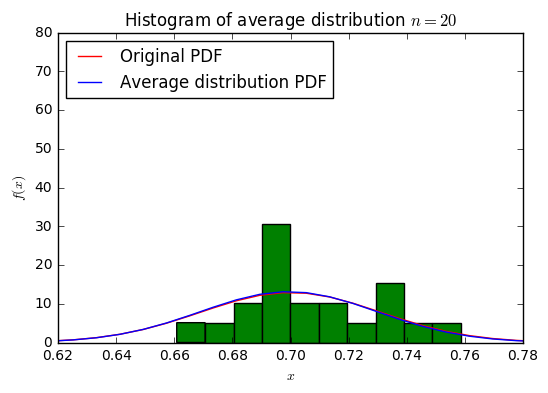

Мат ожидание μ и дисперсия σ исходного распределения:  0.7 , 0.0218465724376 
Мат ожидание μ и дисперсия σ распределения выборочных средних при n = 40 : 0.698958261956 , 0.0226008930363


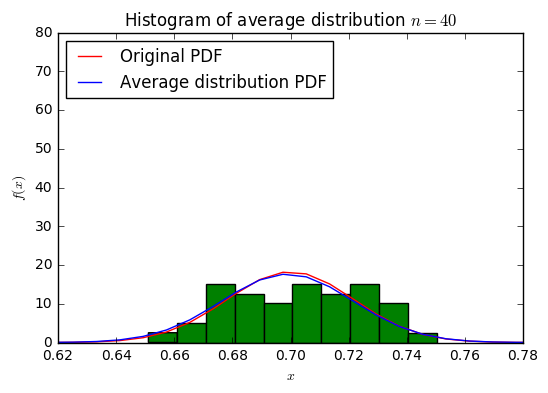

Мат ожидание μ и дисперсия σ исходного распределения:  0.7 , 0.0126131244777 
Мат ожидание μ и дисперсия σ распределения выборочных средних при n = 120 : 0.6996324775 , 0.0122324617264


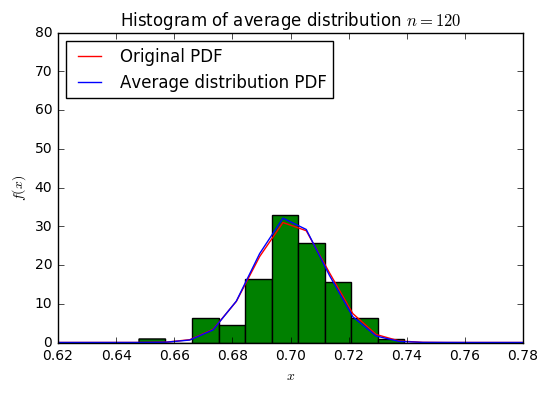

Мат ожидание μ и дисперсия σ исходного распределения:  0.7 , 0.00891882585016 
Мат ожидание μ и дисперсия σ распределения выборочных средних при n = 240 : 0.70012829431 , 0.00884062733496


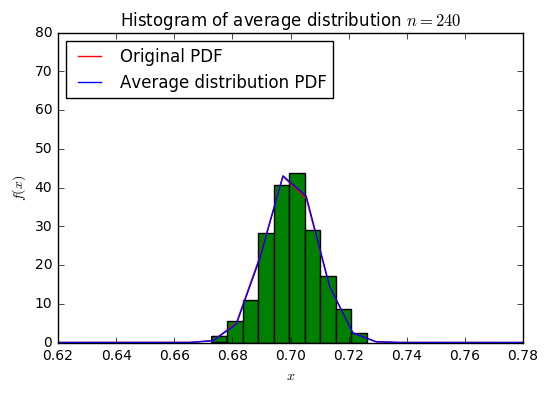

In [16]:
PDF(20)
PDF(40)
PDF(120)
PDF(240)

# Выводы

В результате исследования распределения средних значений случайных величин я показал, что и среднее значение, и дисперсия данного распределения достаточно близки к теоретическим значениям. Кроме того, бета распределение приближается к нормальному распределению при увеличении размера выборки.